In [1]:
import numpy as np
from graphix import Circuit, Statevec
from graphix.ops import Ops
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
circuit = Circuit(2)

# initialize qubits in |0>, not |+>
circuit.h(1)
circuit.h(0)

# apply rotation gates
theta = np.random.rand(2)
circuit.rx(0, theta[0])
circuit.rx(1, theta[1])

In [3]:
pattern = circuit.transpile()
pattern.print_pattern(lim=10)

N, node = 0
N, node = 1
N, node = 2
E, nodes = (1, 2)
M, node = 1, plane = XY, angle(pi) = 0, s-domain = [], t_domain = []
X byproduct, node = 2, domain = [1]
N, node = 3
E, nodes = (0, 3)
M, node = 0, plane = XY, angle(pi) = 0, s-domain = [], t_domain = []
X byproduct, node = 3, domain = [0]
16 more commands truncated. Change lim argument of print_pattern() to show more


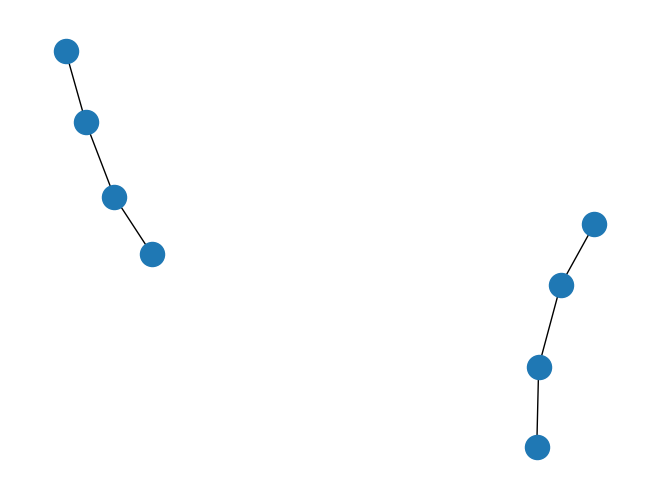

In [4]:
nodes, edges = pattern.get_graph()
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
np.random.seed(100)
nx.draw(g)
plt.show()

In [5]:
out_state = pattern.simulate_pattern()
print(out_state.flatten())

[ 9.86229393e-01+0.00000000e+00j -1.07279745e-20-6.66020189e-02j
 -2.43281661e-20-1.51035499e-01j -1.01997256e-02+1.64292911e-21j]


In [6]:
state = Statevec(nqubit=2, plus_states=False)  # starts with |0> states
state.evolve_single(Ops.Rx(theta[0]), 0)
state.evolve_single(Ops.Rx(theta[1]), 1)
print("overlap of states: ", np.abs(np.dot(state.psi.flatten().conjugate(), out_state.psi.flatten())))

overlap of states:  1.0000000000000002
